# Artificial Neural Networks

### Data
Composed of $X$ and $y$

 - X comes with shape $[d \times n]$ 
 - Each column vector is another unique observation with d features
 - There is a corresponding real value in vector $y$ with shape $[1 \times n]$

 
### Architecture of an ANN
 
![](Figures/ANN_Weights.pdf)

## Forward Propagation

$\hspace{8cm}$ Take the input data (here $d^{[0]} = d$)

$$
a^{[0]} = X
$$

$\hspace{8cm}$ Calculate the outcome of next layer

\begin{equation} \label{eq1}
\begin{split}
z^{[i+1]} & =  W^{[i+1]} a^{[i]} + b^{[i+1]} \\
a^{[i+1]} & = \sigma(z^{[i+1]})
\end{split}
\end{equation}





__Check Dimensions__

> $W^{[1]} a^{[0]}$ with dimensions $[d^{[1]} \times d^{[0]}]$ and $[d^{[0]} \times n]$ outputs first hidden layer with dimensions $[d^{[1]} \times n]$.

Similarly
>$W^{[i+1]} a^{[i]}$ outputs a vector with shape $[d^{[i+1]} \times d^{[i]}] \times [d^{[i]} \times n] = [d^{[i + 1]} \times n]$ 


![](Figures/board.JPG)

# Data
 - Recruitment Robot

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import requests
import io

url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/ARGE/Sorular/1-İseAlımRobotu/data.csv"
s = requests.get(url).content

data = pd.read_csv(io.StringIO(s.decode('utf-8')))
M = data.values
X = M[:,:-1]
y = M[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# For our implemenatation, transposes are needed. 
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

In [15]:
X_train.shape, y_train.shape

((4, 670), (1, 670))

In [16]:
data.head()

,social,algorithm,gpa,age,y
0,4.385110,3.902737,3.854389,3.462752,1
1,4.872397,4.127768,3.802623,3.296719,1
2,4.830242,4.779077,2.979467,2.291362,1
3,4.848431,3.396778,3.130300,3.409216,1
4,3.602784,4.199958,2.820921,1.815152,1


In [17]:
data.y.value_counts()

0    900
1    100
Name: y, dtype: int64

## Linear Transformation

$$W^{[1]} \times a^{[0]} = z^{[1]}$$

In [18]:
W1 = np.random.randint(2, size = (3,5))
W1.shape

(3, 5)

In [19]:
a0 = np.random.randint(2, size = (5,4))
a0.shape

(5, 4)

In [20]:
z1 = W1.dot(a0)
z1.shape

(3, 4)

In [21]:
print(W1.shape , ' x ', a0.shape,  ' = ',z1.shape)

(3, 5)  x  (5, 4)  =  (3, 4)


# Neural Network Architecture

In [22]:
layers = [4,6,6,1]

weight_dims = list(zip(layers[1:], layers[:-1]))
bias_dims = layers[1:]

print("weight_dims: ", weight_dims)
print("bias_dims: ", bias_dims)

weight_dims:  [(6, 4), (6, 6), (1, 6)]
bias_dims:  [6, 6, 1]


In [23]:
weights = [np.random.randn(n,d)/100 for n,d in weight_dims]
biases = [np.random.randn(d)/100 for d in bias_dims]

print("weights ", weights)
print("biases: ", biases)

weights  [array([[-0.01032627, -0.00613371, -0.02073367,  0.00320867],
       [-0.01876751, -0.00106064,  0.00617727,  0.00632558],
       [ 0.0005518 ,  0.00578897,  0.01718797, -0.00743917],
       [ 0.00167716, -0.01197579, -0.00159652,  0.01265029],
       [-0.0047885 ,  0.00765258,  0.00825555, -0.00715218],
       [-0.00578535,  0.0114745 ,  0.01078958, -0.01230101]]), array([[-0.02133078, -0.01629224,  0.0129046 ,  0.00720891, -0.00646733,
         0.00593464],
       [ 0.01607984,  0.01330565, -0.01041004,  0.00622405, -0.01630594,
        -0.01295712],
       [-0.00029427,  0.00648067,  0.00050024,  0.00292801,  0.00619257,
        -0.00145778],
       [-0.00551544,  0.00575566, -0.00161095,  0.0022693 , -0.01108828,
        -0.00300273],
       [-0.0019797 , -0.00555281,  0.00669681, -0.00242111,  0.00656591,
         0.00545747],
       [ 0.00899482,  0.02357558, -0.0183524 , -0.02062463,  0.00255286,
        -0.02016338]]), array([[-0.00558366,  0.00876631, -0.00568115,  0.

# Forward Propagation

In [24]:
weights[0].shape, X_train.shape

((6, 4), (4, 670))

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(z):
    s = sigmoid(z)
    return s * (1.0-s)

In [27]:
a = X_train
for i in range(len(weights)):
    W = weights[i]
    b = biases[i]
    z = W.dot(a) + b.reshape(-1,1)
    a = sigmoid(z)

In [28]:
a.shape, y_train.shape

((1, 670), (1, 670))

## Calculate Error

In [29]:
def cross_entropy_loss(a, y):
    cost = - (y* np.log(a) + (1 - y) * (np.log(1 - a)))
    return cost

In [30]:
#cross_entropy_loss(a, y_train)

## $\hspace{7cm}$Backward Propagation

#### $\hspace{8cm}$Vectorized Cost Function 
$$
J =  \frac{1}{n}( - y \log a^{[i+1]}  - (1 - y) \log (1 - a^{[i+1]}))
$$

#### $\hspace{8cm}$Error at last layer to backpropagate

\begin{equation} 
\begin{split}
dz^{[i+1]}
&= \frac{\partial J}{\partial z^{[i+1]}} &= \frac{\partial J}{\partial a^{[i+1]}}  \frac{\partial a^{[i+1]}}{\partial z^{[i+1]}}  \\
& &= \frac{1}{n} \left( \frac{-y}{a^{[i+1]}} - (-1) \frac{1-y}{1- a^{[i+1]}}\right)  \frac{\partial a^{[i+1]}}{\partial z^{[i+1]}}\\
& &= \frac{1}{n} \left( \frac{a^{[i+1]}-y}{a^{[i+1]}(1-a^{[i+1]})}\right) \left(a^{[i+1]}(1-a^{[i+1]})\right)\\
& &= \frac{1}{n}  \left(a^{[i+1]}-y\right)
\end{split}
\end{equation}

$\hspace{8cm}$ __In python:__ `dz = np.mean(a-y)`


### $\hspace{7cm}$Backpropagate to previous layer
### $\hspace{8cm}$Forward
\begin{equation} \label{eq1}
\begin{split}
a^{[i]} & = \sigma(z^{[i]})\\
z^{[i+1]} & =  W^{[i+1]} a^{[i]} + b^{[i+1]} 
\end{split}
\end{equation}

### $\hspace{8cm}$Backward

\begin{equation} 
\begin{split}
dz^{[i]} 
&= \frac{\partial J}{\partial z^{[i]}} &=   \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial a^{[i]}} \frac{\partial a^{[i]}}{\partial z^{[i]}}\\
& &= \left(  \left(W^{[i+1]}\right)^{T} dz^{[i+1]} \right)  \sigma'(z^{[i]})\\
\end{split}
\end{equation}

$\hspace{8cm}$ __In python:__ `dz = np.dot(W.T , dz) * derivative_sigma(z)` 

##### $\hspace{8cm}$ Dimension Check

\begin{equation} 
\begin{split}
W^{[i+1]} & \rightarrow & \;[d^{[i+1]}, d^{[i]}] \\
dz^{[i+1]} & \rightarrow & \;[d^{[i+1]}, 1] \\
z^{[i]} & \rightarrow & \;[d^{[i]},1] \\
\end{split}
\end{equation}

## Backward Propagation

####  Cost Function for one example
$$
J =  - y_{i} \log a_{i}  - (1 - y_{i}) \log (1 - a))
$$


### Architecture of an ANN
 
![](Figures/ANN_Weights.pdf)

#### Error at last layer to backpropagate
For one example
\begin{equation} 
\begin{split}
dz 
&= \frac{\partial J}{\partial z} &= \frac{\partial J}{\partial a}  \frac{\partial a}{\partial z}  \\
& &= \frac{a-y}{a(1-a)} a(1-a)\\
& &= a-y
\end{split}
\end{equation}

Error for whole dataset
\begin{equation} 
\begin{split}
dz 
&= np.mean(a-y)
\end{split}
\end{equation}

#### Backward Propagation
\begin{equation} 
\begin{split}
dz^{[i]} 
&= \frac{\partial J}{\partial z^{[i]}} &=   \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial a^{[i]}} \frac{\partial a^{[i]}}{\partial z^{[i]}}\\
& &= dz^{[i+1]} W^{[i+1]}  \sigma'(z^{[i]})\\
& &= np.dot(W^{[i+1]}.T, dz^{[i+1]}) \sigma'(z^{[i]})
\end{split}
\end{equation}

#### Update Parameters

$\hspace{8cm}$ Weight update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial W^{[i+1]}} 
&= \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial W^{[i+1]}} \\
&= dz^{[i+1]} a^{[i]}.T \\
\end{split}
\end{equation}

$\hspace{8cm}$ Bias update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial b^{[i+1]}} 
&= \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial b^{[i+1]}} \\
&= dz^{[i+1]}\\
\end{split}
\end{equation}


#### Key to backprogation

\begin{equation} 
\begin{split}
dz^{[i+1]}
&= 
\frac{\partial J}{\partial z^{[i+1]}} \\
\end{split}
\end{equation}

In [32]:
# forward propagation
a = X_train
cache = {'a0':a}
for i in range(len(weights)):
    W = weights[i]
    b = biases[i]
    z = W.dot(a) + b.reshape(-1,1)
    a = sigmoid(z)
    
    cache[f'W{i+1}'] = W
    cache[f'b{i+1}'] = b
    cache[f'a{i+1}'] = a
    cache[f'z{i+1}'] = z

In [33]:
[(key, cache[key].shape) for key in cache.keys()]

[('a0', (4, 670)),
 ('W1', (6, 4)),
 ('b1', (6,)),
 ('a1', (6, 670)),
 ('z1', (6, 670)),
 ('W2', (6, 6)),
 ('b2', (6,)),
 ('a2', (6, 670)),
 ('z2', (6, 670)),
 ('W3', (1, 6)),
 ('b3', (1,)),
 ('a3', (1, 670)),
 ('z3', (1, 670))]

<figure> 
    <img src="Figures/w3.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on last weight matrix</figcaption> 
</figure>


In [34]:
# dz[3]
dz = cache['a3'] - y_train ## Error at last layer
dz.shape

(1, 670)

In [35]:
db = dz.mean(axis = 1)
db

array([0.40421427])

In [36]:
cache['a2'].shape, cache['z3'].shape

((6, 670), (1, 670))

In [37]:
dw = dz.dot(cache['a2'].T)
dw.shape, cache['W3'].shape

((1, 6), (1, 6))

In [38]:
## Learning rate
alpha = 0.01

In [39]:
cache['W3'] = cache['W3'] - alpha * dw 
cache['W3'].shape

(1, 6)

In [40]:
cache['b3'] = cache['b3'] - alpha * db
cache['b3'].shape

(1,)

<figure> 
    <img src="Figures/w3.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on last weight matrix</figcaption> 
</figure>

#### Backward Propagation
\begin{equation} 
\begin{split}
dz^{[i]} = np.dot(W^{[i+1]}.T, dz^{[i+1]}) \sigma'(z^{[i]})
\end{split}
\end{equation}




In [41]:
dz.shape

(1, 670)

In [42]:
# bacpropagate from d[z3] to d[z2]
dz = np.dot(cache['W3'].T, dz) * derivative_sigmoid(cache['z2'])
dz.shape

(6, 670)

<figure> 
    <img src="Figures/w2.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on previous layer</figcaption> 
</figure>

#### Update Parameters

Weight update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial W^{[i+1]}} 
&= dz^{[i+1]} a^{[i]}.T \\
\end{split}
\end{equation}

Bias update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial b^{[i+1]}} 
&= dz^{[i+1]}\\
\end{split}
\end{equation}

In [43]:
dz.shape, cache['a2'].shape

((6, 670), (6, 670))

In [44]:
dw = dz.dot(cache['a1'].T)
dw.shape

(6, 6)

In [45]:
cache['W2'] = cache['W2'] - alpha * dw 
cache['W2'].shape

(6, 6)

In [46]:
db = dz.mean(axis = 1)
db.shape

(6,)

In [47]:
cache['b2'] = cache['b2'] - alpha * db
cache['b2'].shape

(6,)


#### Backward Propagation
\begin{equation} 
\begin{split}
dz^{[i]} = np.dot(W^{[i+1]}.T, dz^{[i+1]}) \sigma'(z^{[i]})
\end{split}
\end{equation}




In [48]:
dz.shape

(6, 670)

In [49]:
# bacpropagate from d[z2] to d[z1]
dz = np.dot(cache['W2'].T, dz) * derivative_sigmoid(cache['z1'])
dz.shape

(6, 670)

<figure> 
    <img src="Figures/w1.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on previous layer</figcaption> 
</figure>


#### Update Parameters

Weight update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial W^{[i+1]}} 
&= dz^{[i+1]} a^{[i]}.T \\
\end{split}
\end{equation}

Bias update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial b^{[i+1]}} 
&= dz^{[i+1]}\\
\end{split}
\end{equation}

In [50]:
dw = dz.dot(cache['a0'].T)
dw.shape

(6, 4)

In [51]:
cache['W1'] = cache['W1'] - alpha * dw 
cache['W1'].shape

(6, 4)

In [52]:
db = dz.mean(axis = 1)
db.shape

(6,)

In [53]:
cache['b2'] = cache['b2'] - alpha * db
cache['b2'].shape

(6,)

# ANN From Scratch

In [72]:
def cross_entropy_loss(a, y):
    cost = - np.mean(y * np.log(a) + (1 - a) * np.log(1 - a))
    return np.squeeze(cost)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(z):
    s = sigmoid(z)
    return s * (1.0-s)

def construct(layers = [4,6,6,1]):
    weight_dims = list(zip(layers[1:], layers[:-1]))
    bias_dims = layers[1:]

    weights = [np.random.randn(n,d)/100.0 for n,d in weight_dims]
    biases = [np.random.randn(d,1)/100.0 for d in bias_dims]
    
    return weights, biases

def forward_propagation(X_train, weights, biases):
    # forward propagation
    a = X_train
    cache = {'a0':a}
    for i in range(len(weights)):
        W = weights[i]
        b = biases[i]
        z = W.dot(a) + b
        a = sigmoid(z)

        cache[f'W{i+1}'] = W
        cache[f'b{i+1}'] = b
        cache[f'a{i+1}'] = a
        cache[f'z{i+1}'] = z
    return cache

def backward_propagation(X_train, y_train, weights, biases,alpha = 0.01, epochs = 1000):
    cache = forward_propagation(X_train, weights, biases)
    last = len(cache)//4 
    n = X_train.shape[1]
    
    loss = cross_entropy_loss(cache[f'a{last}'], y_train)
    J = [loss]

    for epoch in range(epochs):
        dz = cache[f'a{last}'] - y_train # d[z3]
        for i in range(last,0,-1):
            db = dz.mean()
            dw = dz.dot(cache[f'a{i-1}'].T)/n

            # Gradient Descent
            cache[f'W{i}'] = cache[f'W{i}'] - alpha * dw 
            cache[f'b{i}'] = cache[f'b{i}'] - alpha * db

            # backpropagate from d[z3] to d[z2]
            if i == 1: break
            dz = np.dot(cache[f'W{i}'].T, dz) * derivative_sigmoid(cache[f'z{i-1}'])

        weights = [cache[f'W{i+1}'] for i in range(len(cache)//4)]
        biases = [cache[f'b{i+1}'] for i in range(len(cache)//4)]

        cache = forward_propagation(X_train, weights, biases)
        loss = cross_entropy_loss(cache[f'a{last}'], y_train)
        J.append(loss)
    return cache, J

def predict(X_test, cache):
    last = len(cache)//4
    
    weights = [cache[f'W{i+1}'] for i in range(last)]
    biases = [cache[f'b{i+1}'] for i in range(last)]
    
    new_cache = forward_propagation(X_test, weights, biases)
    a = new_cache[f'a{last}']
    
    return (a > 0.5) + 0

# Test

[[290   4]
 [  8  28]]


Text(0, 0.5, 'Loss J')

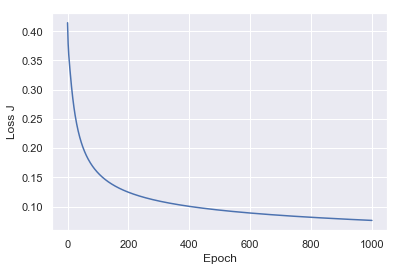

In [73]:
weights, biases = construct(layers = [4,1] )
cache, J = backward_propagation(X_train, y_train, weights, biases, alpha = 0.1, epochs = 1000)

y_pred = predict(X_test, cache)
print(confusion_matrix(y_test[0], y_pred[0]))

plt.plot(J);plt.xlabel('Epoch');plt.ylabel('Loss J')

In [74]:
[(key, cache[key].shape) for key in cache.keys()]

[('a0', (4, 670)),
 ('W1', (1, 4)),
 ('b1', (1, 1)),
 ('a1', (1, 670)),
 ('z1', (1, 670))]

[[294   0]
 [ 10  26]]


Text(0, 0.5, 'Loss J')

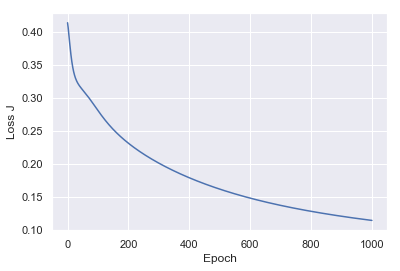

In [75]:
weights, biases = construct(layers = [4,6,1] )
cache, J = backward_propagation(X_train, y_train, weights, biases, alpha = 0.1, epochs = 1000)

y_pred = predict(X_test, cache)
print(confusion_matrix(y_test[0], y_pred[0]))

plt.plot(J);plt.xlabel('Epoch');plt.ylabel('Loss J')

In [76]:
[(key, cache[key].shape) for key in cache.keys()]

[('a0', (4, 670)),
 ('W1', (6, 4)),
 ('b1', (6, 1)),
 ('a1', (6, 670)),
 ('z1', (6, 670)),
 ('W2', (1, 6)),
 ('b2', (1, 1)),
 ('a2', (1, 670)),
 ('z2', (1, 670))]

In [65]:
dz = np.array([[2,2,2,2]])
np.sum(dz) / 4

2.0